In [25]:
#In Jupyter Notebook container , execute
#python ./GetEventsFromRabbitMQ.py  > ../../logs/ACI/CaseInQueue/2020-CaseInQueue.txt 

import glob
import pandas as pd
from dateutil import parser
import datetime

def ReadInQueuefile(filename='/home/jovyan/HTTSDashboard/logs/ACI/events/*_InQueueEvent.txt'):
    
    CaseInQueueFileList = glob.glob(filename)
    #print(CaseInQueueFileList)
    for file in CaseInQueueFileList:
        
        print('Processing InQueue events from {}'.format(file))
        with open(file,'r') as f:
            InQueueEvents = f.readlines()
        f.close()
        #print(InQueueEvents[0])
        ###### Add index ######
        InQueueEvents = [[idx,*line.strip().split('-~')] for idx,line in enumerate(InQueueEvents)]
        #print(InQueueEvents[10])
        
        ###### Split Date-Time to Date and Time columns ######
        InQueueEvents = [[*event,parser.parse(event[4]).strftime("%Y-%m-%d")] for event in InQueueEvents]
        InQueueEvents = [[*event,parser.parse(event[4]).strftime("%H:%M:%S")] for event in InQueueEvents]
        #print(InQueueEvents[10])
        
        ###### Add Weekdays start from 0(Monday) ######
        InQueueEvents = [[*event,parser.parse(event[4]).weekday()] for event in InQueueEvents]
        #print(InQueueEvents[10])
        
        pd_labels = ['Idx','No','Sev','Queue','DateTime','Date','Time','Weekday']
        df = pd.DataFrame.from_records(InQueueEvents,columns=pd_labels)
        #print(df)
        return df
    
df = ReadInQueuefile()
df = df[df['Date'].between('2020-05-15','2020-05-21',inclusive=True)]
df[-10:]

Processing InQueue events from /home/jovyan/HTTSDashboard/logs/ACI/events/2020_InQueueEvent.txt


,Idx,No,Sev,Queue,DateTime,Date,Time,Weekday
1596,1596,689134086,3,CX-APJC-SYD-ACI-SSPT,2020-05-21 03:03:00,2020-05-21,03:03:00,3
1597,1597,689133191,3,CX-APJC-SYD-ACI-SSPT,2020-05-21 03:15:09,2020-05-21,03:15:09,3
1598,1598,689134064,3,CX-APJC-BLR-ACI-SSPT,2020-05-21 03:27:04,2020-05-21,03:27:04,3
1599,1599,689056399,3,CX-APJC-BLR-ACI-SSPT,2020-05-21 03:30:21,2020-05-21,03:30:21,3
1600,1600,689134289,3,CX-APJC-SYD-ACI-SSPT,2020-05-21 04:08:48,2020-05-21,04:08:48,3
1601,1601,689128378,2,CX-APJC-BLR-ACI-SSPT,2020-05-21 04:14:19,2020-05-21,04:14:19,3
1602,1602,689134216,3,CX-APJC-BLR-ACI-SSPT,2020-05-21 04:21:59,2020-05-21,04:21:59,3
1603,1603,689134352,3,CX-APJC-BLR-ACI-SSPT,2020-05-21 04:31:28,2020-05-21,04:31:28,3
1604,1604,689134406,3,CX-APJC-BLR-ACI-SSPT,2020-05-21 04:50:06,2020-05-21,04:50:06,3
1605,1605,689134528,2,CX-APJC-SYD-ACI-SSPT,2020-05-21 05:34:58,2020-05-21,05:34:58,3


In [26]:
import matplotlib as plt
%matplotlib notebook
%matplotlib inline

###### 1. Average Case Count By Weekdays ######
###### 2. Total Case Trend ######
###### 3. SYD BLR LB Result #######
###### 4. Volumne per hour/per 3 hours ######

In [27]:
###### 1.1 Total Cases per weekdays ######
df_cnt_by_weekday = df.groupby(['Weekday']).agg('count').reset_index()
df_cnt_by_weekday

,Weekday,Idx,No,Sev,Queue,DateTime,Date,Time
0,0,17,17,17,17,17,17,17
1,1,15,15,15,15,15,15,15
2,2,26,26,26,26,26,26,26
3,3,18,18,18,18,18,18,18
4,4,19,19,19,19,19,19,19
5,5,26,26,26,26,26,26,26
6,6,13,13,13,13,13,13,13


In [28]:
###### 1.2 Weekdays Count ######
df_weekday_cnt = df.groupby(['Date']).agg('mean').groupby(['Weekday']).agg('count')
df_weekday_cnt = df_weekday_cnt.reset_index()
df_weekday_cnt['Weekday'] = df_weekday_cnt['Weekday'].astype('int')
df_weekday_cnt

,Weekday,Idx
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1


In [29]:
###### 1.3 New Count Avg Per Weekday DF ######
df_avgcnt_weekdy = df_cnt_by_weekday
df_avgcnt_weekdy['WeekdayCount'] = df_weekday_cnt['Idx']
df_avgcnt_weekdy['AvgCase'] = df_avgcnt_weekdy['No']/df_avgcnt_weekdy['WeekdayCount']
df_avgcnt_weekdy['AvgCase'].astype('float64')
df_avgcnt_weekdy['AvgCase'] = df_avgcnt_weekdy['AvgCase'].round(1)
#df_avgcnt_weekdy.drop(['No','WeekdayCount'], axis=1, inplace=True)

#add weekday name
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df_avgcnt_weekdy['WeekdayName'] = df_avgcnt_weekdy['Weekday'].apply(lambda x: days[x])
df_avgcnt_weekdy

,Weekday,Idx,No,Sev,Queue,DateTime,Date,Time,WeekdayCount,AvgCase,WeekdayName
0,0,17,17,17,17,17,17,17,1,17.0,Monday
1,1,15,15,15,15,15,15,15,1,15.0,Tuesday
2,2,26,26,26,26,26,26,26,1,26.0,Wednesday
3,3,18,18,18,18,18,18,18,1,18.0,Thursday
4,4,19,19,19,19,19,19,19,1,19.0,Friday
5,5,26,26,26,26,26,26,26,1,26.0,Saturday
6,6,13,13,13,13,13,13,13,1,13.0,Sunday


Text(0, 0.5, '')

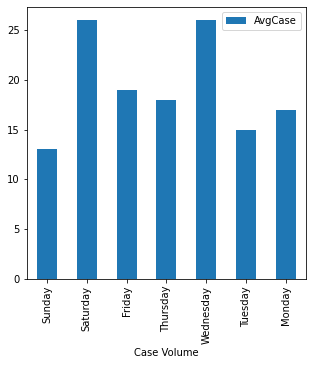

In [30]:
###### 1.4 Plot Average case per weekday ######
ax = df_avgcnt_weekdy[::-1].plot(kind='bar',x='WeekdayName',y='AvgCase',figsize=(5,5))
ax.set_xlabel("Case Volume")
ax.set_ylabel("")

In [17]:
###### 2.1 Total Case Per date ######
df_totcase = df.groupby(['Date']).agg('count').reset_index()
df_totcase

,Date,Idx,No,Sev,Queue,DateTime,Time,Weekday
0,2020-05-15,19,19,19,19,19,19,19
1,2020-05-16,26,26,26,26,26,26,26
2,2020-05-17,13,13,13,13,13,13,13
3,2020-05-18,17,17,17,17,17,17,17
4,2020-05-19,15,15,15,15,15,15,15
5,2020-05-20,26,26,26,26,26,26,26
6,2020-05-21,12,12,12,12,12,12,12


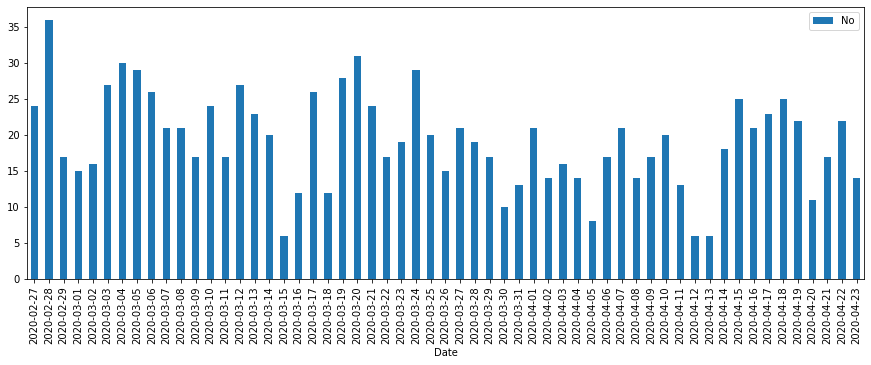

In [49]:
###### 2.2 Total Case Per date Plot ######
#TODO Add weekday on top of date.
df_totcase.plot(kind='bar',x='Date',y='No',figsize=(15,5))

In [50]:
##### 2.3.1 Solution Total Case per workgroup ######
#df_totcase_wg = df.groupby(['Date','Queue']).agg('count').reset_index()
df_totcase_wg = df.groupby(['Date','Queue'],as_index=False).size().unstack().fillna(0)
df_totcase_wg = df_totcase_wg.reset_index()
df_totcase_wg

Queue,Date,CX-APJC-BLR-ACI-SSPT,CX-APJC-SYD-ACI-SSPT,FTS,UC,WW-ACI-Solutions,WW-Rakuten-ACI
0,2020-02-27,12.0,0.0,4.0,0.0,8.0,0.0
1,2020-02-28,16.0,0.0,0.0,0.0,20.0,0.0
2,2020-02-29,0.0,0.0,2.0,0.0,15.0,0.0
3,2020-03-01,0.0,0.0,0.0,0.0,15.0,0.0
4,2020-03-02,2.0,12.0,2.0,0.0,0.0,0.0
5,2020-03-03,14.0,9.0,2.0,0.0,2.0,0.0
6,2020-03-04,10.0,12.0,3.0,0.0,5.0,0.0
7,2020-03-05,12.0,12.0,3.0,0.0,2.0,0.0
8,2020-03-06,11.0,11.0,3.0,0.0,0.0,1.0
9,2020-03-07,8.0,10.0,2.0,1.0,0.0,0.0


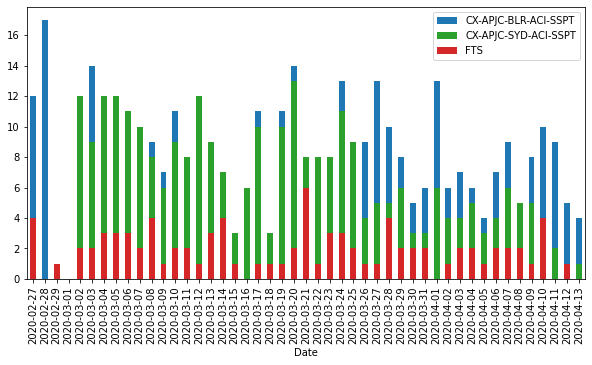

In [42]:
##### 2.3.2 (incomplete) Solution 1Total Case per workgroup ######
df_totcase_wg_ax = df_totcase_wg.plot(x="Date", y="CX-APJC-BLR-ACI-SSPT", kind="bar",figsize=(10,5))
df_totcase_wg.plot(x="Date", y="CX-APJC-SYD-ACI-SSPT", kind="bar", ax=df_totcase_wg_ax, color="C2")
df_totcase_wg.plot(x="Date", y="FTS", kind="bar", ax=df_totcase_wg_ax, color="C3")

In [51]:
##### 2.3.2 Solution2 Total Case per workgroup ######
df_totcase_wg_2 = df.groupby(['Date','Queue'],as_index=False).size().unstack().fillna(0)
df_totcase_wg_2

Queue,CX-APJC-BLR-ACI-SSPT,CX-APJC-SYD-ACI-SSPT,FTS,UC,WW-ACI-Solutions,WW-Rakuten-ACI
Date,,,,,,
2020-02-27,12.0,0.0,4.0,0.0,8.0,0.0
2020-02-28,16.0,0.0,0.0,0.0,20.0,0.0
2020-02-29,0.0,0.0,2.0,0.0,15.0,0.0
2020-03-01,0.0,0.0,0.0,0.0,15.0,0.0
2020-03-02,2.0,12.0,2.0,0.0,0.0,0.0
2020-03-03,14.0,9.0,2.0,0.0,2.0,0.0
2020-03-04,10.0,12.0,3.0,0.0,5.0,0.0
2020-03-05,12.0,12.0,3.0,0.0,2.0,0.0
2020-03-06,11.0,11.0,3.0,0.0,0.0,1.0


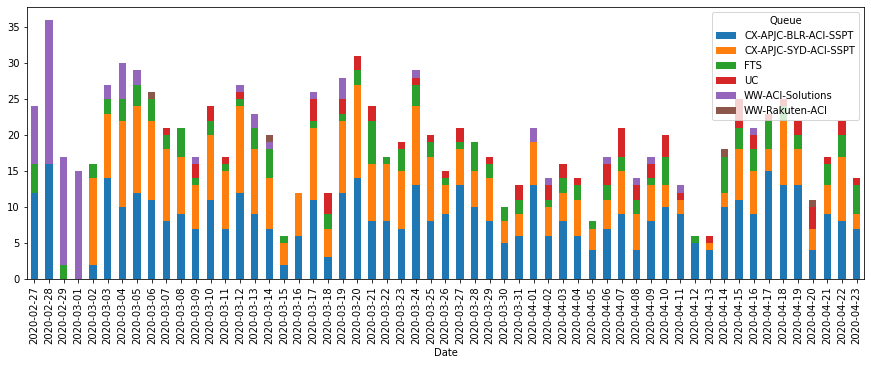

In [52]:
df_totcase_wg_2.plot(kind='bar',stacked=True,figsize=(15,5))

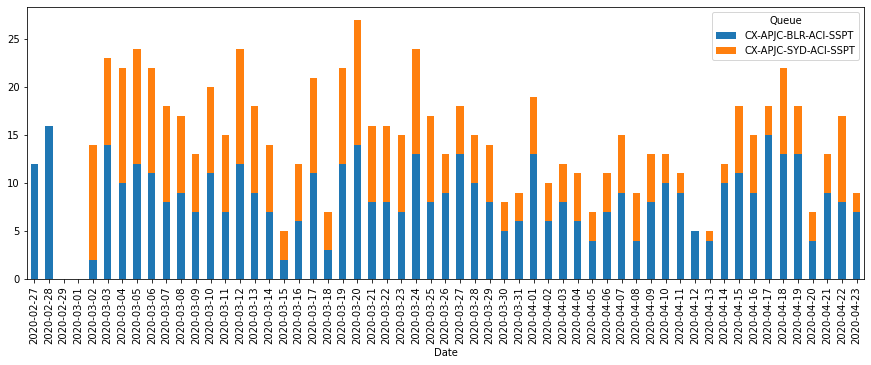

In [53]:
###### 3.1 SYD BLR LB Result #######
df_totcase_wg_3 = df.groupby(['Date','Queue'],as_index=False).size().unstack().fillna(0)
df_totcase_wg_3[['CX-APJC-BLR-ACI-SSPT','CX-APJC-SYD-ACI-SSPT']].plot(kind='bar',stacked=True,figsize=(15,5))

In [54]:
###### 3.2 SYD BLR LB Ration Result #######
#df_totcase_wg_3_2.set_index('Date')
df_totcase_wg_3_2 = df.groupby(['Date','Queue'],as_index=False).size().unstack().fillna(0)
#df_totcase_wg_3_2 = df_totcase_wg_3_2.drop(['FTS','UC','WW-Rakuten-ACI','WW-ACI-Solutions'],axis=1)
df_totcase_wg_3_2 = df_totcase_wg_3_2.reset_index()
df_totcase_wg_3_2['Ratio'] = df_totcase_wg_3_2['CX-APJC-BLR-ACI-SSPT']/(df_totcase_wg_3_2['CX-APJC-SYD-ACI-SSPT']+0.0001)
df_totcase_wg_3_2

Queue,Date,CX-APJC-BLR-ACI-SSPT,CX-APJC-SYD-ACI-SSPT,FTS,UC,WW-ACI-Solutions,WW-Rakuten-ACI,Ratio
0,2020-02-27,12.0,0.0,4.0,0.0,8.0,0.0,120000.000000
1,2020-02-28,16.0,0.0,0.0,0.0,20.0,0.0,160000.000000
2,2020-02-29,0.0,0.0,2.0,0.0,15.0,0.0,0.000000
3,2020-03-01,0.0,0.0,0.0,0.0,15.0,0.0,0.000000
4,2020-03-02,2.0,12.0,2.0,0.0,0.0,0.0,0.166665
5,2020-03-03,14.0,9.0,2.0,0.0,2.0,0.0,1.555538
6,2020-03-04,10.0,12.0,3.0,0.0,5.0,0.0,0.833326
7,2020-03-05,12.0,12.0,3.0,0.0,2.0,0.0,0.999992
8,2020-03-06,11.0,11.0,3.0,0.0,0.0,1.0,0.999991
9,2020-03-07,8.0,10.0,2.0,1.0,0.0,0.0,0.799992


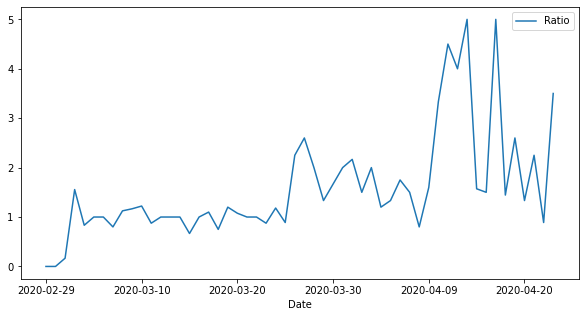

In [55]:
df_totcase_wg_3_2[df_totcase_wg_3_2['Ratio'] < 100].plot(x='Date',y='Ratio',figsize=(10,5))

#df_totcase_wg_3_2.plot(kind='bar',stacked=True,y=['CX-APJC-BLR-ACI-SSPT','CX-APJC-SYD-ACI-SSPT'])
#ax = df_totcase_wg_3_2[df_totcase_wg_3_2['Ratio'] < 100].plot(secondary_y=True,y='Ratio',figsize=(10,5))
#ax.set_ylabel('size')

In [56]:
###### 4. Volumne per hour/per 3 hours ######

###### 4.1 Initizalit new DF
col_names =  ['Date', 'Weekday','H1', 'H2', 'H3', 'H4', 'H5', 'H6']
df_case_by_hour  = pd.DataFrame(columns = col_names)
df_case_by_hour

,Date,Weekday,H1,H2,H3,H4,H5,H6


In [57]:
df[df['Date'].between('2020-02-27','2020-02-27',inclusive=True)]

,Idx,No,Sev,Queue,DateTime,Date,Time,Weekday
0,0,688479512,2,FTS,2020-02-27 01:00:40,2020-02-27,01:00:40,3
1,1,688534586,2,FTS,2020-02-27 01:05:19,2020-02-27,01:05:19,3
2,2,688534894,3,CX-APJC-BLR-ACI-SSPT,2020-02-27 01:05:44,2020-02-27,01:05:44,3
3,3,688523370,2,FTS,2020-02-27 01:20:11,2020-02-27,01:20:11,3
4,4,688521682,3,FTS,2020-02-27 01:24:09,2020-02-27,01:24:09,3
5,5,688526522,3,CX-APJC-BLR-ACI-SSPT,2020-02-27 02:00:11,2020-02-27,02:00:11,3
6,6,688496665,3,WW-ACI-Solutions,2020-02-27 02:00:19,2020-02-27,02:00:19,3
7,7,688470172,3,CX-APJC-BLR-ACI-SSPT,2020-02-27 02:00:20,2020-02-27,02:00:20,3
8,8,688535441,3,CX-APJC-BLR-ACI-SSPT,2020-02-27 03:01:20,2020-02-27,03:01:20,3
9,9,688535441,3,WW-ACI-Solutions,2020-02-27 03:16:27,2020-02-27,03:16:27,3


In [59]:
###### 4.2 count case per hour per day #######
df_case_by_hour  = pd.DataFrame(columns = col_names)

def DFCasePerHourByDate(df_new,df_raw,start_hour=0,date='2020-04-05'):
    df_1day = df_raw[df_raw['Date'].between(date,date,inclusive=True)]
    #how many days in the selected date
    #days17 = df_1day.groupby(['Date']).agg('mean').groupby(['Weekday']).agg('count').sum()['Idx']
    #How many cases in selected hours
    if start_hour == 0:
        cv1 = df_1day[df_1day['Time'].between('00:00:00','00:59:59', inclusive=True)].count()['Idx']
        cv2 = df_1day[df_1day['Time'].between('01:00:00','01:59:59', inclusive=True)].count()['Idx']
        cv3 = df_1day[df_1day['Time'].between('02:00:00','02:59:59', inclusive=True)].count()['Idx']
        cv4 = df_1day[df_1day['Time'].between('03:00:00','03:59:59', inclusive=True)].count()['Idx']
        cv5 = df_1day[df_1day['Time'].between('04:00:00','04:59:59', inclusive=True)].count()['Idx']
        cv6 = df_1day[df_1day['Time'].between('05:00:00','05:59:59', inclusive=True)].count()['Idx']
    elif start_hour == 1:
        cv1 = df_1day[df_1day['Time'].between('01:00:00','01:59:59', inclusive=True)].count()['Idx']
        cv2 = df_1day[df_1day['Time'].between('02:00:00','02:59:59', inclusive=True)].count()['Idx']
        cv3 = df_1day[df_1day['Time'].between('03:00:00','03:59:59', inclusive=True)].count()['Idx']
        cv4 = df_1day[df_1day['Time'].between('04:00:00','04:59:59', inclusive=True)].count()['Idx']
        cv5 = df_1day[df_1day['Time'].between('05:00:00','05:59:59', inclusive=True)].count()['Idx']
        cv6 = df_1day[df_1day['Time'].between('06:00:00','06:59:59', inclusive=True)].count()['Idx']
        
    Case_per_day = [date,parser.parse(date).weekday(),cv1,cv2,cv3,cv4,cv5,cv6]
    df_new = df_new.append(pd.Series(Case_per_day, index=df_new.columns ), ignore_index=True)
    
    return df_new

cur_datetime = parser.parse('2020-02-27')
end_datetime = parser.parse('2020-03-28')
while cur_datetime <= end_datetime:
    #print("Processing ... {}".format(cur_datetime.strftime("%Y-%m-%d")))
    #print(df_case_by_hour)
    df_case_by_hour = DFCasePerHourByDate(df_case_by_hour,df,start_hour=0,date=cur_datetime.strftime("%Y-%m-%d"))
    cur_datetime = cur_datetime + datetime.timedelta(days=1)
cur_datetime = parser.parse('2020-03-29')
end_datetime = parser.parse('2020-04-04')
while cur_datetime <= end_datetime:
    #print("Processing ... {}".format(cur_datetime.strftime("%Y-%m-%d")))
    df_case_by_hour = DFCasePerHourByDate(df_case_by_hour,df,start_hour=0,
                                          date=cur_datetime.strftime("%Y-%m-%d"))
    cur_datetime = cur_datetime + datetime.timedelta(days=1)
cur_datetime = parser.parse('2020-04-05')
end_datetime = parser.parse('2020-04-08')
while cur_datetime <= end_datetime:
    #print("Processing ... {}".format(cur_datetime.strftime("%Y-%m-%d")))
    df_case_by_hour = DFCasePerHourByDate(df_case_by_hour,df,start_hour=0,
                                          date=cur_datetime.strftime("%Y-%m-%d"))
    cur_datetime = cur_datetime + datetime.timedelta(days=1)
    
df_case_by_hour

,Date,Weekday,H1,H2,H3,H4,H5,H6
0,2020-02-27,3,0,5,3,7,2,5
1,2020-02-28,4,0,5,12,7,5,4
2,2020-02-29,5,0,5,3,3,1,0
3,2020-03-01,6,0,2,4,4,2,1
4,2020-03-02,0,0,2,1,2,3,5
5,2020-03-03,1,0,7,3,8,6,1
6,2020-03-04,2,0,6,4,4,5,9
7,2020-03-05,3,0,10,3,1,4,2
8,2020-03-06,4,0,6,1,6,6,3
9,2020-03-07,5,0,10,3,2,3,1


In [40]:
df_case_by_hour['H123'] = df_case_by_hour['H1'] + df_case_by_hour['H2'] + df_case_by_hour['H3']
df_case_by_hour['H456'] = df_case_by_hour['H4'] + df_case_by_hour['H5'] + df_case_by_hour['H6']
df_case_by_hour

,Date,Weekday,H1,H2,H3,H4,H5,H6,H123,H456
0,2020-02-27,3,0,5,3,7,2,5,8,14
1,2020-02-28,4,0,5,12,7,5,4,17,16
2,2020-02-29,5,0,5,3,3,1,0,8,4
3,2020-03-01,6,0,2,4,4,2,1,6,7
4,2020-03-02,0,0,2,1,2,3,5,3,10
5,2020-03-03,1,0,7,3,8,6,1,10,15
6,2020-03-04,2,0,6,4,4,5,9,10,18
7,2020-03-05,3,0,10,3,1,4,2,13,7
8,2020-03-06,4,0,6,1,6,6,3,7,15
9,2020-03-07,5,0,10,3,2,3,1,13,6


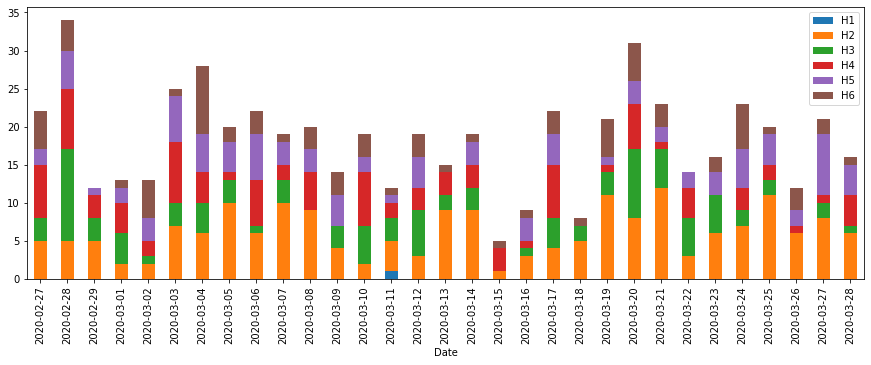

In [50]:
df_case_by_hour.set_index('Date')[:31].plot(y=['H1','H2','H3','H4','H5','H6'],figsize=(15,5),kind='bar',stacked=True)

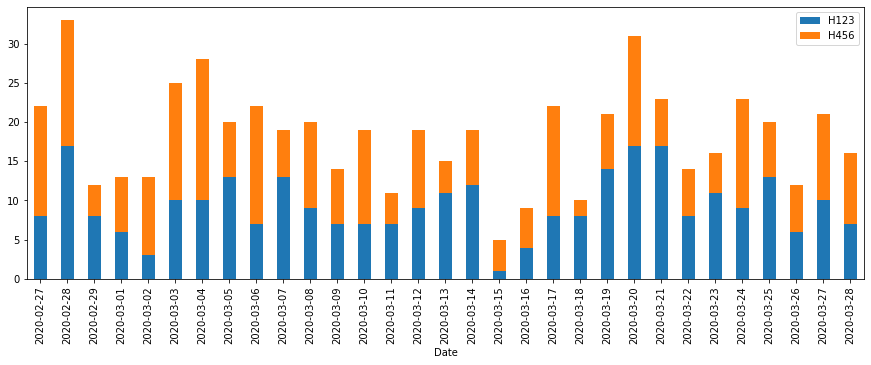

In [41]:
df_case_by_hour.set_index('Date')[:31].plot(y=['H123','H456'],figsize=(15,5),kind='bar',stacked=True)